In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''
def loadDataSet(path):
    dataMat = [];labelMat = []
    with open(path) as f:
        for line in f.readlines()[1:]:
            lineList = line.strip().split()
            dataMat.append([1.0,float(lineList[1]),float(lineList[2]),
            float(lineList[1])**2,float(lineList[2])**2])
            labelMat.append(int(lineList[0]))
    return dataMat,labelMat
#画图
def plotDataSet(path):
    datamat = pd.read_csv(path,sep = "\t",header=0)
    groups=datamat.groupby(datamat.y)
    group_1=groups.get_group(1)
    group_0=groups.get_group(0)
    ax=group_0.plot.scatter(x='X1',y='X2',color='r')
    group_1.plot.scatter(x='X1',y='X2',color='b',ax=ax)
'''


def loadLamba(path):
    lamb=[]
    with open(path) as f:
        for line in f.readlines():
            lineList = line.strip().split()
            lamb.append(lineList)
    return lamb

def L_2(weights):
    
    return np.square(weights).sum()

def sigmoid(z):
    
    return 1.0/(1+np.exp(-z))

def costReg(weights,X,y,lamb):
    weights=np.matrix(weights)
    X=np.matrix(X)
    y=np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*weights)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*weights)))
    reg = lamb/(2*len(X))*L_2(weights)
    return np.sum(first -second )/len(X)+reg

def gradientReg(weights,X,y,lamb):
    weights=np.matrix(weights)
    X=np.matrix(X)
    y=np.matrix(y)

    parameters=int(weights.ravel().shape[1])
    grad = np.zeros(parameters)
    error= sigmoid(X*weights)-y.T
    for j in range (parameters):
        term = np.multiply(error,X[:,j])

        if (j==0):
            grad[j] = np.sum(term)/len(X)
        else:
            grad[j] = (np.sum(term)/len(X)) + ((lamb/len(X))*weights[j,:])
    grad=np.matrix(grad)
    return grad

def train(lamb,X,y,alpha=0.1):
    n,m = np.shape(X)
    weights =np.mat(np.ones((m,1)))
    maxCycles = 1000
    for i in range(0,maxCycles):
        grad=gradientReg(weights,X,y,lamb)
        weights= weights - (alpha*grad).T
    #print(weights)
    return weights

def loaddata(path):
    data=pd.read_csv(path,header=None,sep = "\t",names=['y','x1','x2'])[1:]
    return data

def clip_data(data):
    x1 = data['x1']
    x2 = data['x2']
    y =data['y']
    x1=pd.to_numeric(x1)
    x2=pd.to_numeric(x2)
    y=pd.to_numeric(y)
    return y,x1,x2

def festure_mapping(x1,x2,degree):
    data = pd.DataFrame()
    data['常数项']=None
    for i in range(1,degree+1):#从1取到6
        for j in range(0,i+1):
            data['F'+str(i-j) + str(j)] = np.power(x1,i-j) * np.power(x2,j)
    data['常数项']=1
    return data 

def txt2data(path,degree):
    data=loaddata(path)
    y,x1,x2=clip_data(data)
    data=festure_mapping(x1,x2,degree)
    
    return data,y
    
def predict(weights,X):
    X=np.matrix(X)
    weights=np.matrix(weights)
    probability = sigmoid(X*weights)
    return [1 if x>=0.5 else 0 for x in probability]
    

#数据可视化
def plotData(data,X_labels,y_label):
    positive = data[data[y_label].isin([1])]
    negative = data[data[y_label].isin([0])]

    fig,ax = plt.subplots(figsize=(12,8))
    ax.scatter(positive[X_labels[0]],positive[X_labels[1]],s=50,c='b',marker='o',label='ffs')
    ax.scatter(negative[X_labels[0]],negative[X_labels[1]],s=50,c='r',marker='x',label='值为1')
    ax.set_xlabel(X_labels[0]+'SCORE')
    ax.set_ylabel(X_labels[1]+'SCORE')

In [60]:
degree=6
train_data,train_label = txt2data('train.txt',degree)
test_data,test_label = txt2data('test.txt',degree)

In [ ]:
#shisuan
n,m = np.shape(train_data)
weights =np.mat(np.ones((m,1)))
print(m)

In [ ]:
#试算
n,m = np.shape(train_data)
weights =np.mat(np.ones((m,1)))
lamb=1
alpha=0.1
X=train_data
y=train_label
#for i in range(0,20):
grad=gradientReg(weights,X,y,lamb)
weights= weights +(alpha*grad).T
print(weights)
grad=gradientReg(weights,X,y,lamb)
weights= weights -(alpha*grad).T
#print(weights)

In [45]:


weights=train(68.66488450043,train_data,train_label)
weights
predictions= predict(weights,train_data)#####！！！！！
correct = [1 if ((a==1 and b== 1)or(a==0 and b== 0)) else 0 for (a,b) in zip(predictions,train_label) ]
accuracy= (sum(map(int,correct))% len(correct))
print ('accuracy={0}%'.format(accuracy))



accuracy=78%


In [ ]:
weights

In [ ]:
#cs

weights.shape
list=[]
for i in lamb:
    for j in i:
        list.append(j)
a=pd.DataFrame(columns=['1e+10'], index=range(0,weights.shape[0]))
a['1e+10']=weights
a

In [61]:
def change_lamb(lamb,is_train=True):
    if is_train==True:
        p_data=train_data
        p_lebal=train_label
    else:
        p_data=test_data
        p_lebal=test_label

    list=[]
    for i in lamb:
        for j in i:
            list.append(j) 
    a=pd.DataFrame(columns=list)
    accuracy_list=[]
    for i in lamb:
        for j in i:
            weights=train(float(j),train_data,train_label)
            predictions= predict(weights,p_data)
            correct = [1 if ((a==1 and b== 1)or(a==0 and b== 0)) else 0 for (a,b) in zip(predictions,p_lebal) ]
            accuracy= (sum(map(int,correct))% len(correct)) 
            accuracy_list.append(accuracy)
            #print ('lambda={0},accuracy={1}%'.format(float(j),accuracy))
            lamb_weight=pd.DataFrame(columns=[j],index=range(0,weights.shape[0]))
            lamb_weight[j]=weights
            #print(weights)
            #print(lamb_weight)
            a[j]=lamb_weight[j]
    return accuracy_list
lamb=loadLamba('lambda.txt')
lamb
acc_list=change_lamb(lamb,is_train=True)
        

C:\Users\MR\AppData\Local\Temp/ipykernel_11608/2389416592.py:39: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-z))


In [ ]:
acc_list_test=change_lamb(lamb,is_train=False)
acc_list_test

In [ ]:
lambdas = list(np.array(pd.read_csv('lambda.txt', header=None).values).flatten())

log_lambdas = [np.log10(i) for i in  lambdas]


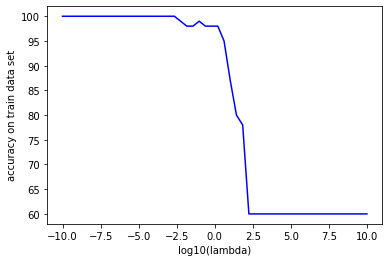

In [71]:
plt.plot(log_lambdas, acc_list, c='blue')
plt.xlabel('log10(lambda)')
plt.ylabel('accuracy on train data set')
plt.show()

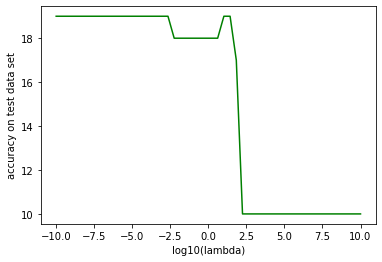

In [73]:
plt.plot(log_lambdas, acc_list_test, c='green')
plt.xlabel('log10(lambda)')
plt.ylabel('accuracy on test data set')
plt.show()


In [63]:
len(acc_list)

50

In [74]:
from scipy import optimize as opt

train_results = opt.fmin_tnc(func=costReg, x0=weights, fprime=gradientReg, args=(train_data, train_label, 1))

ValueError: shapes (118,28) and (1,28) not aligned: 28 (dim 1) != 1 (dim 0)

In [ ]:
#lamb_weight['1e+10']=weights
type(lamb_weight['68.66488450043'])


In [ ]:
##beifen
def change_lamb(lamb):
    for i in lamb:
        for j in i:
            weights=train(float(j),train_data,test_label)
            predictions= predict(weights,train_data)
            correct = [1 if ((a==1 and b== 1)or(a==0 and b== 0)) else 0 for (a,b) in zip(predictions,train_label) ]
            accuracy= (sum(map(int,correct))% len(correct))
            #print ('lambda={0},accuracy={1}%'.format(float(j),accuracy))
    return accuracy
lamb=loadLamba('lambda.txt')
lamb
lamb_weight=change_lamb(lamb)
        

In [ ]:
type(lamb_weight)
aa=np.asarray(lamb_weight)
aa.index

In [ ]:
lamb_weight.shape
x=pd.DataFrame()
x['1']=aa

In [ ]:
#调线性包
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2')
model.fit(train_data,train_label)
model.score(test_data,test_label)

In [ ]:
#数据可视化
def plotData(data,X_labels,y_label):
    positive = data[data[y_label].isin([1])]
    negative = data[data[y_label].isin([0])]

    fig,ax = plt.subplots(figsize=(12,8))
    ax.scatter(positive[X_labels[0]],positive[X_labels[1]],s=50,c='b',marker='o',label='ffs')
    ax.scatter(negative[X_labels[0]],negative[X_labels[1]],s=50,c='r',marker='x',label='值为1')
    ax.set_xlabel(X_labels[0]+'SCORE')
    ax.set_ylabel(X_labels[1]+'SCORE')

In [ ]:
#画图用数据
data=pd.DataFrame()
data['y']=train_label
data['x1']=train_data.F10
data['x2']=train_data.F01
plotData(data,['x1','x2'],'y')



In [ ]:
#cs
X_labels=['x1','x2']
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive[X_labels[0]],positive['x2'],c='g',marker='o',label='值为0')
ax.scatter(negative[X_labels[0]],negative['x2'],c='b',marker='x',label='值为1')
ax.set_xlabel('x1'+'SCORE')

In [ ]:
len(weights)

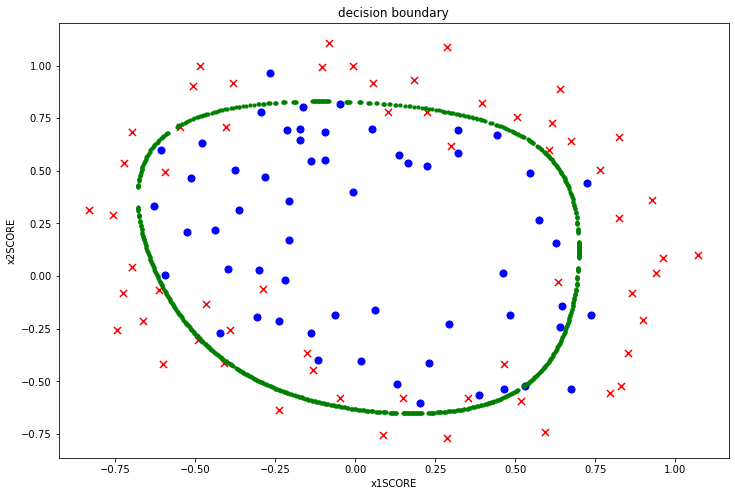

In [56]:
#画边界
def find_decision_boundary(density,degree,theta,threshhold,cord_bounds):
    t1 =  np.linspace(cord_bounds[0],cord_bounds[1],density)
    t2 =  np.linspace(cord_bounds[2],cord_bounds[3],density)

    cordinates = [(x,y) for x in t1 for y in t2 ]
    x_cord , y_cord =zip(*cordinates)
    mapped_cord = festure_mapping(x_cord,y_cord,degree)
    #mapped_cord.insert(0,'Ones',1)
    inner_product = np.matrix(mapped_cord)*theta
    decision =  mapped_cord[np.abs(inner_product)<threshhold]
    return decision .F10,decision .F01

def draw_boundary(data,degree,theta,X_labels,y_label,cord_bounds):
    density=1000
    threshhould=2*10**-3

    x,y = find_decision_boundary(density,degree,theta,threshhould,cord_bounds)
    positive = data[data[y_label].isin([1])]
    negative = data[data[y_label].isin([0])]

    plotData(data,X_labels,y_label)
    plt.scatter(x,y,c='g',s=10)
    plt.title('decision boundary')
#weights=lamb_weight['68.66488450043']
#weights=weights.values
#weights=np.mat(weights)
weights=train(1.59985871960606,train_data,train_label)
draw_boundary(data,degree,weights,['x1','x2'],'y',[-1,1.5,-1,1.5])

In [ ]:
weights=lamb_weight['68.66488450043']
weights=weights.values
weights=np.mat(weights)